In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data set load and overview

In [33]:
df = pd.read_csv('data.csv')
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [34]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [35]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [36]:
df.shape

(11914, 16)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [38]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


# Missing Values Check

In [39]:
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

###  Fuel Type – Fill in mode

In [40]:
df['Engine Fuel Type'].fillna(df['Engine Fuel Type'].mode()[0], inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_16640\1848097029.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Engine Fuel Type'].fillna(df['Engine Fuel Type'].mode()[0], inplace=True)


In [41]:
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        0
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

### Engine HP –  fill in Mean


In [10]:
df.fillna(({'Engine HP':df['Engine HP'].mean()}), inplace=True)

In [11]:
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        0
Engine HP               0
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

### Engine Cylinders – fill in median

In [12]:
df.fillna(({'Engine Cylinders' :df['Engine Cylinders'].median()}), inplace=True)

In [18]:
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        0
Engine HP               0
Engine Cylinders        0
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

#### Market Category column dropped because it has too many missing values ​​(3742)

In [13]:
data1 = df.drop(columns=['Market Category'],inplace=True)

In [14]:
data1

In [15]:
df.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      6
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

### number of doors: fill in mode

In [16]:
df.fillna(({'Number of Doors':df['Number of Doors'].mode()[0]}), inplace=True)

In [17]:
df.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

### Missing values visualization

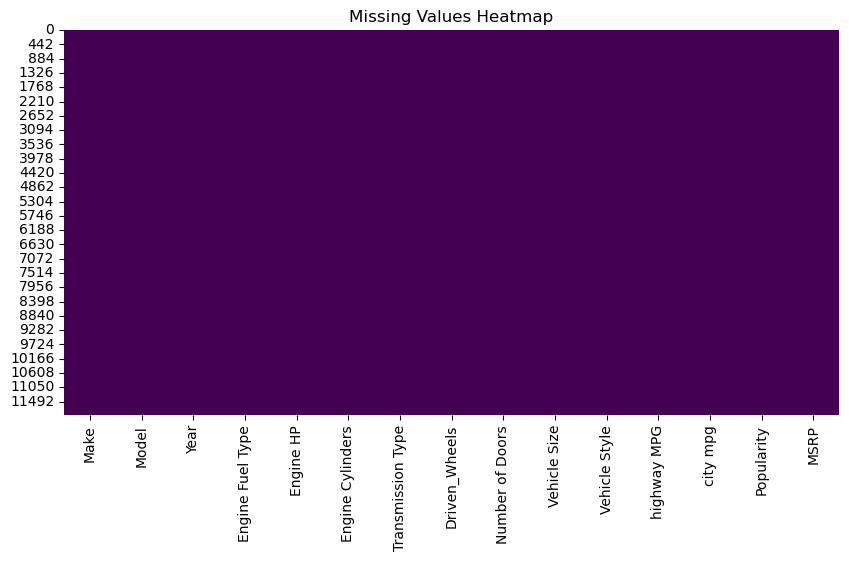

In [18]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

### there are no missing value

### Correlation heatmap (numeric columns only)

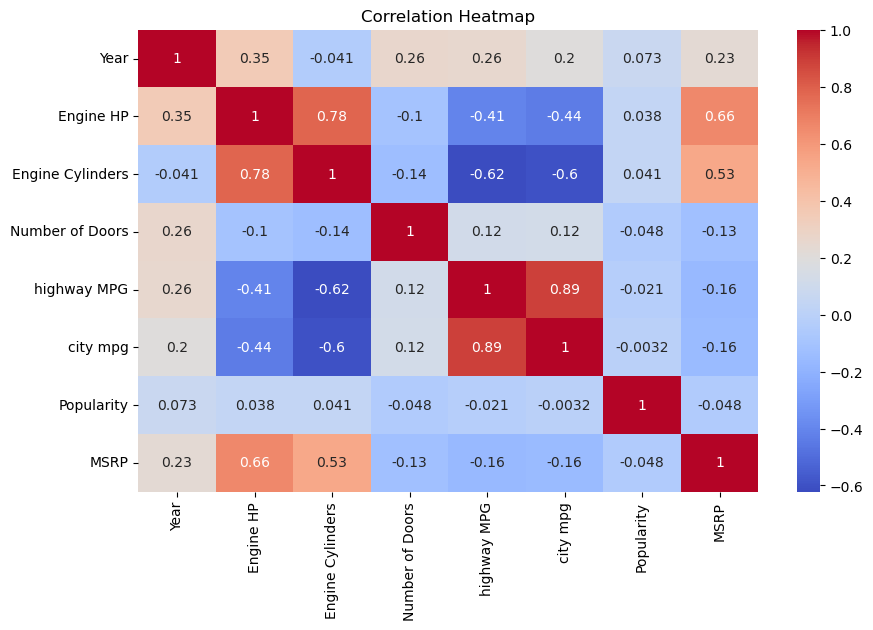

In [42]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

### Distribution of key numeric features

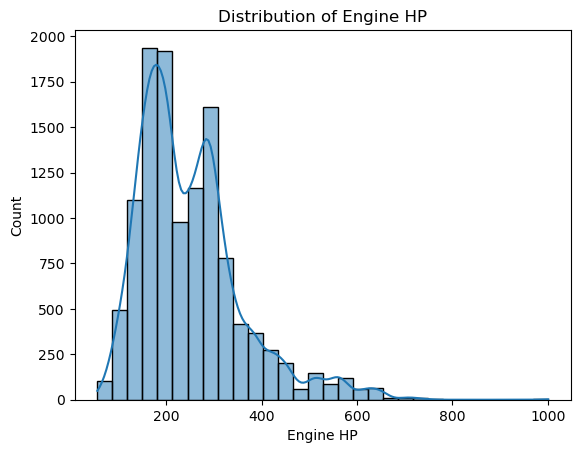

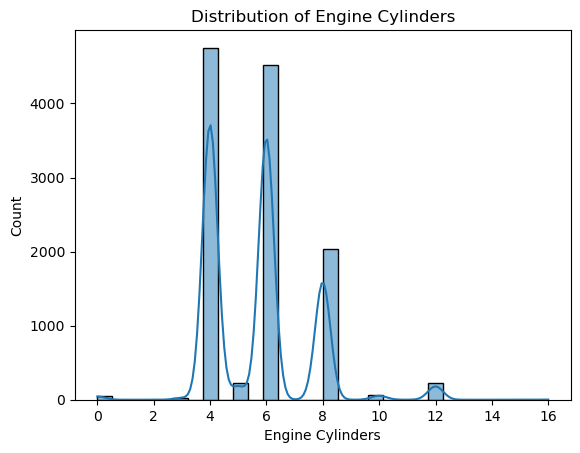

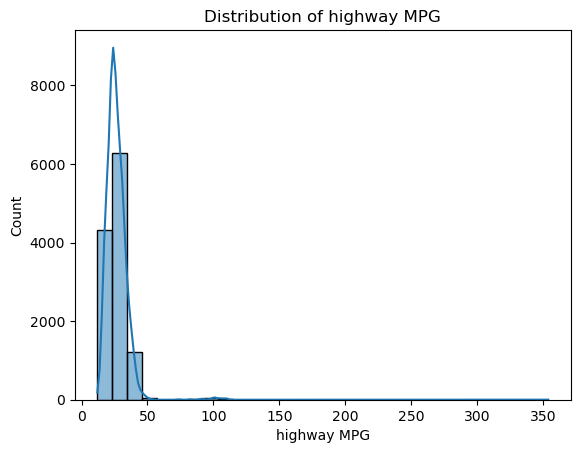

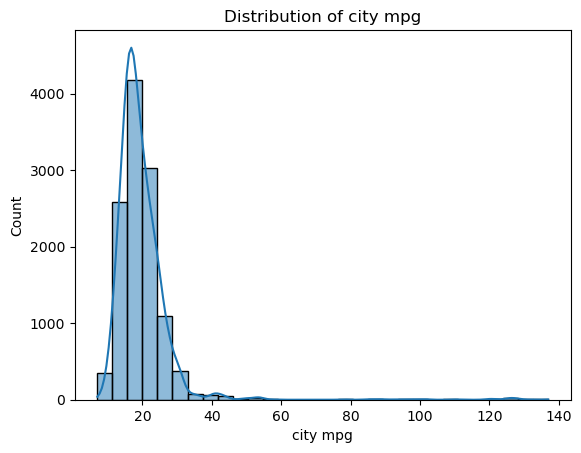

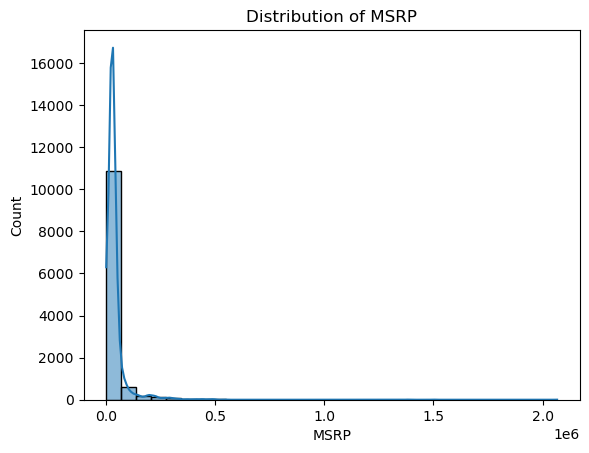

In [20]:
numeric_cols = ['Engine HP', 'Engine Cylinders', 'highway MPG', 'city mpg', 'MSRP']
for col in numeric_cols:
    plt.figure()
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

Engine hp - by ploating the engine hp distribution it is visible that data is swed.

Engine Cylinders- most common engine cylinders counts is 4.

highway MPG- highway MPG lives betweeen 20-50.

city mpg- Most cars have city MPG between 15–25, with very few cars showing extremely high mileage.

MSRP- Most cars are affordably priced, with very few cars having extremely high MSRP.

### Top car makes count


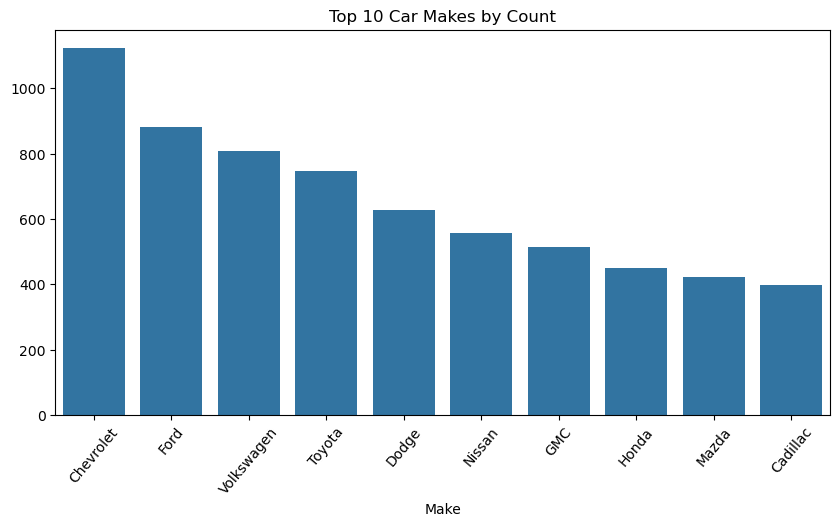

In [21]:
plt.figure(figsize=(10,5))
top_makes = df['Make'].value_counts().head(10)
sns.barplot(x=top_makes.index, y=top_makes.values)
plt.title("Top 10 Car Makes by Count")
plt.xticks(rotation=50)
plt.show()

Chevrolet dominates the dataset in terms of car count, with other brands showing a gradual decrease.

### Vehicle Size vs Average Price

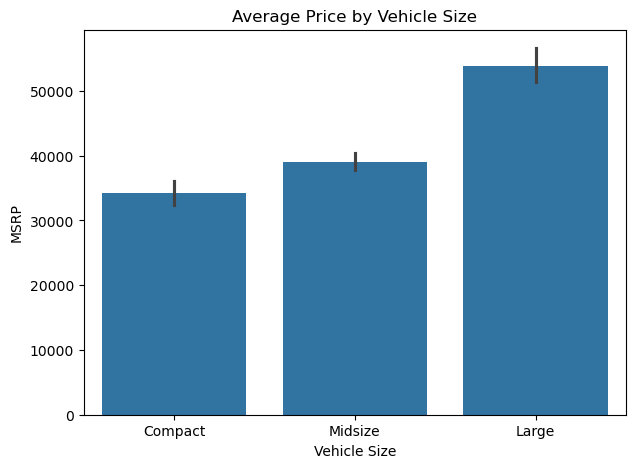

In [28]:
plt.figure(figsize=(7,5))
sns.barplot(x='Vehicle Size', y='MSRP', data=df)
plt.title("Average Price by Vehicle Size")
plt.show()


Larger vehicles generally have higher average prices compared to smaller ones.

### Transmission Type vs Average Price

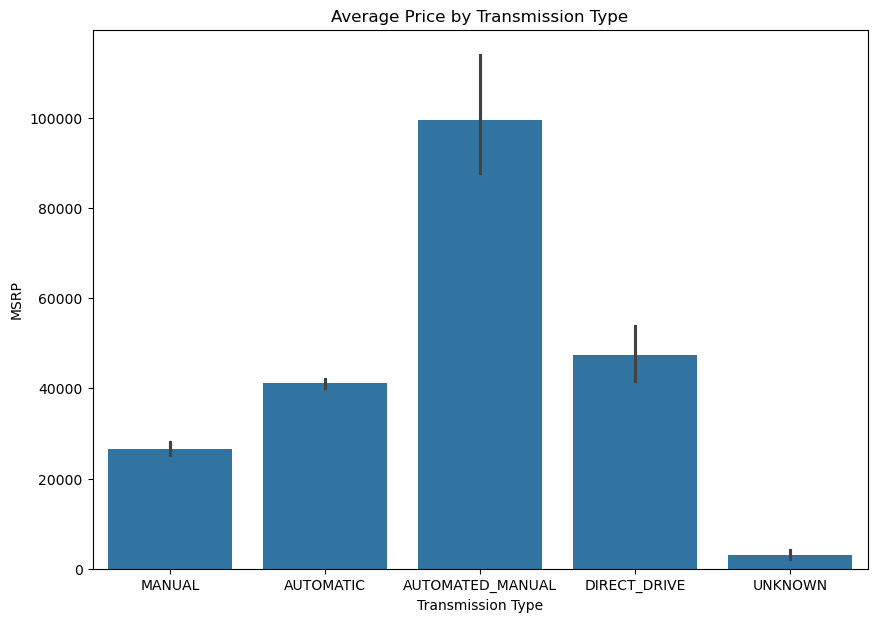

In [22]:
plt.figure(figsize=(10,7))
sns.barplot(x='Transmission Type', y='MSRP', data=df)
plt.title("Average Price by Transmission Type")
plt.show()



Transmission type significantly affects price, with automated manual cars being the most expensive.

## Average Price by Driven Wheels

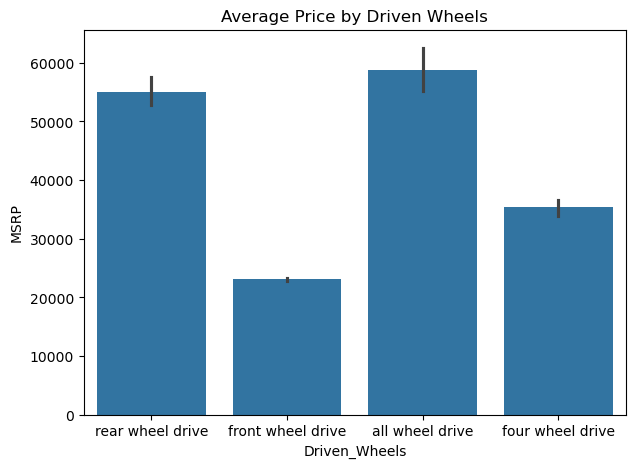

In [23]:
plt.figure(figsize=(7,5))
sns.barplot(x='Driven_Wheels', y='MSRP', data=df)
plt.title("Average Price by Driven Wheels")
plt.show()

Cars with rear or all-wheel drive are more expensive than front-wheel drive cars

### Year vs Average Price trend

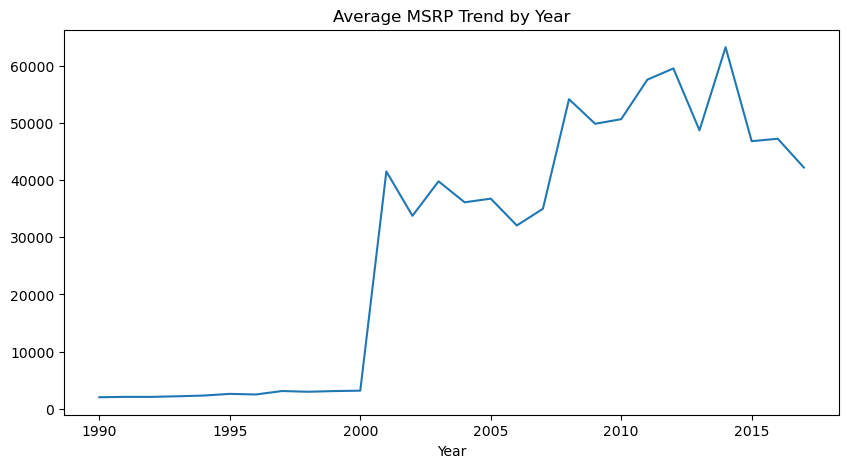

In [24]:
yearly_price = df.groupby("Year")["MSRP"].mean()
plt.figure(figsize=(10,5))
sns.lineplot(x=yearly_price.index, y=yearly_price.values)
plt.title("Average MSRP Trend by Year")
plt.show()

Car prices generally increased over time, with some ups and downs.

### Engine HP vs MSRP

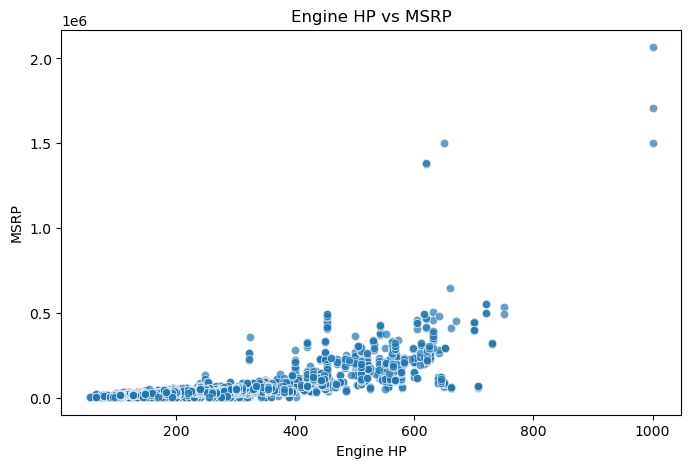

In [25]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Engine HP', y='MSRP', data=df, alpha=0.7)
plt.title('Engine HP vs MSRP')
plt.show()

As engine horsepower increases, the MSRP generally increases, showing a positive correlation with a few high-price outliers at very high HP

### Engine Cylinders vs MSRP

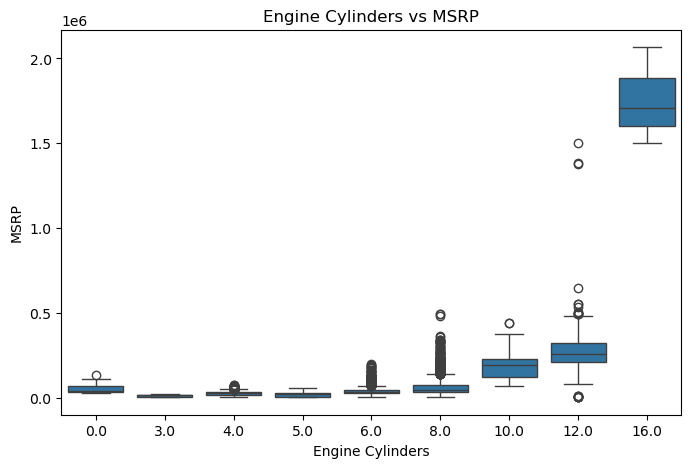

In [43]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Engine Cylinders', y='MSRP', data=df)
plt.title('Engine Cylinders vs MSRP')
plt.show()

Cars with more engine cylinders generally have higher MSRP, with 8, 12, and especially 16-cylinder engines showing significantly higher prices and greater variability.

### Engine Fuel Type vs Average Price

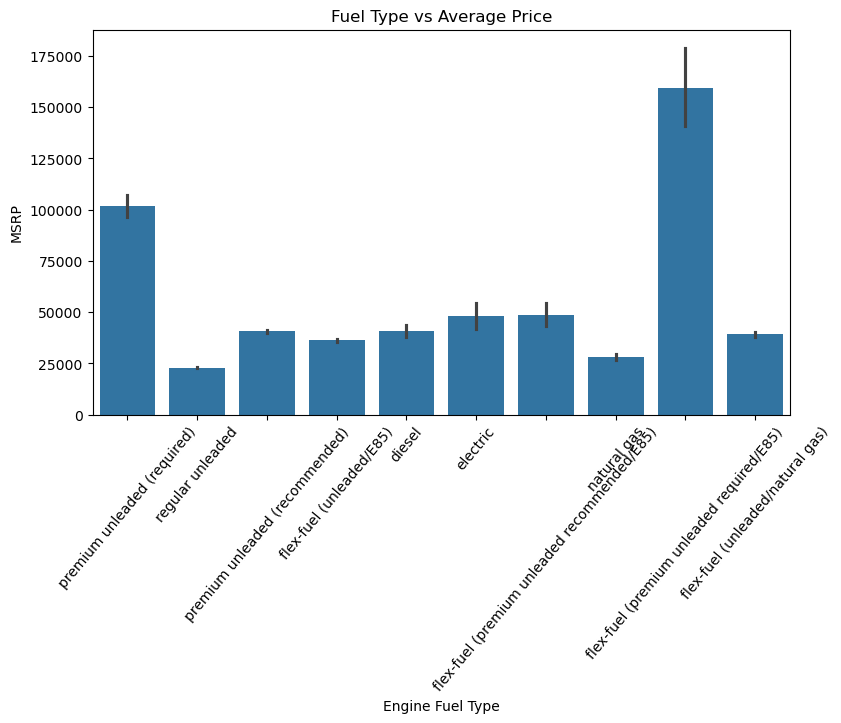

In [27]:
plt.figure(figsize=(9,5))
sns.barplot(x='Engine Fuel Type', y='MSRP', data=df)
plt.title('Fuel Type vs Average Price')
plt.xticks(rotation=50)
plt.show()

MSRP varies by fuel type, with premium unleaded and electric vehicles generally priced higher than regular unleaded and flex-fuel options.

### Popularity vs MSRP

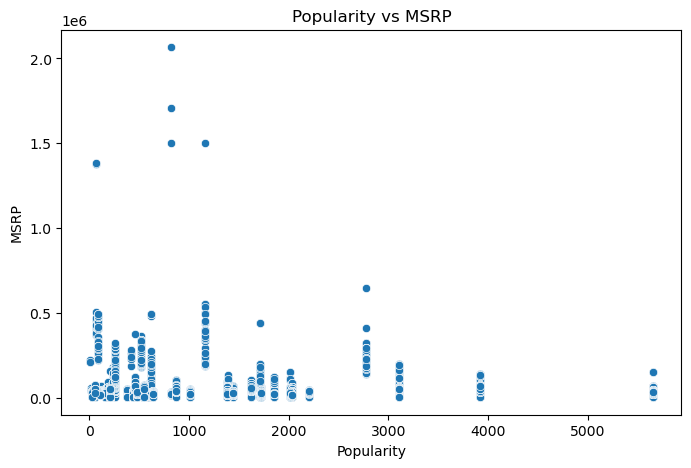

In [28]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Popularity', y='MSRP', data=df)
plt.title('Popularity vs MSRP')
plt.show()


There is no strong relationship between popularity and MSRP, as both low- and high-priced cars appear across all popularity levels.

### Vehicle Style vs Average Price

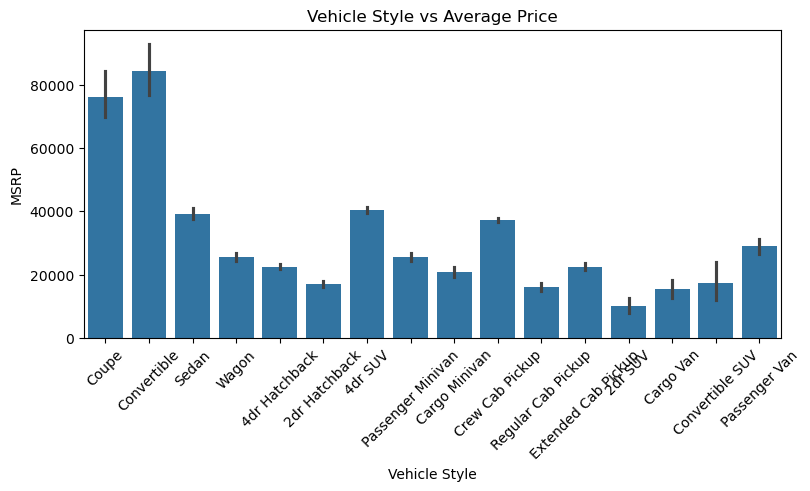

In [59]:
plt.figure(figsize=(9,4))
sns.barplot(x='Vehicle Style', y='MSRP', data=df)
plt.title('Vehicle Style vs Average Price')
plt.xticks(rotation=45)
plt.show()


Average vehicle price varies by body style, with convertibles and coupes being the most expensive, while hatchbacks and pickups are generally more affordable.

### Transmission Type vs Highway MPG

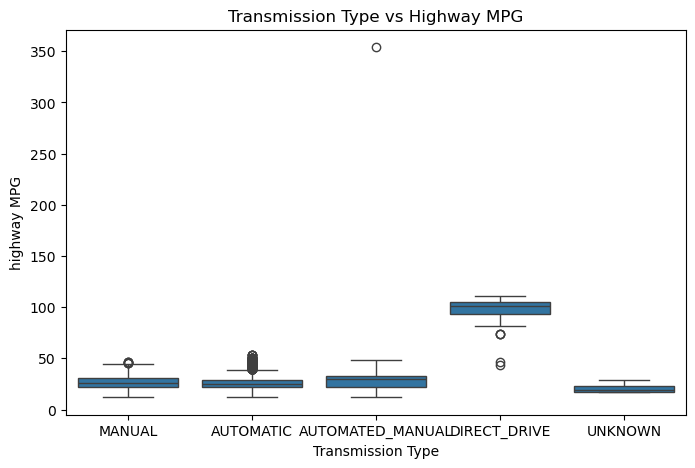

In [29]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Transmission Type', y='highway MPG', data=df)
plt.title('Transmission Type vs Highway MPG')
plt.show()


Direct-drive transmissions (mostly electric vehicles) achieve the highest highway MPG, while manual and automatic transmissions have similar, lower fuel efficiency.

### Vehicle Size vs Engine HP

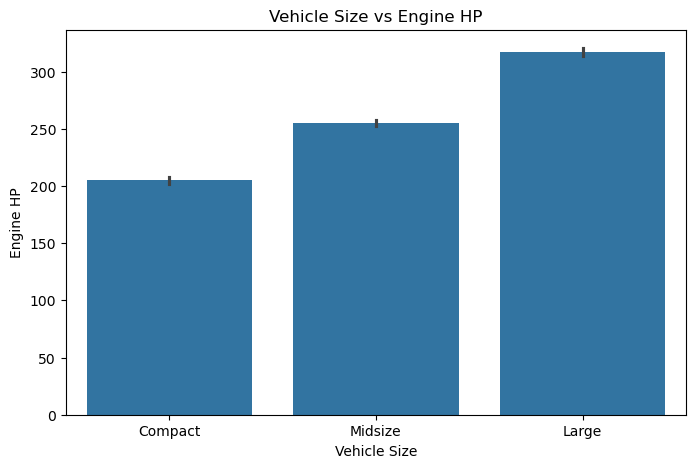

In [30]:
plt.figure(figsize=(8,5))
sns.barplot(x='Vehicle Size', y='Engine HP', data=df)
plt.title('Vehicle Size vs Engine HP')
plt.show()

Average engine horsepower increases with vehicle size, with large vehicles having the highest HP and compact vehicles the lowest.

### Outlier Detection for MSRP

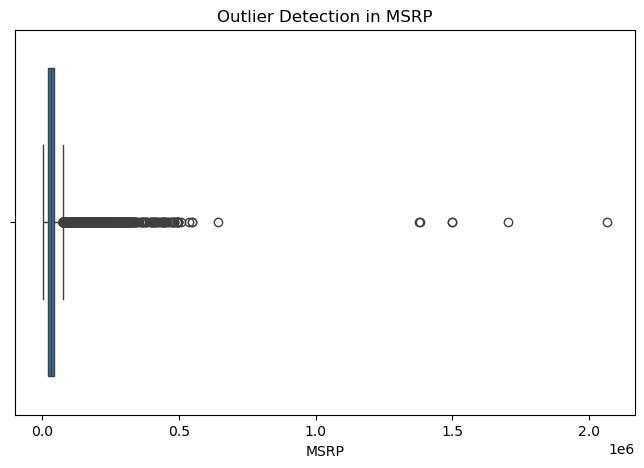

In [31]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['MSRP'])
plt.title('Outlier Detection in MSRP')
plt.show()

MSRP data is highly right-skewed with several extreme high-price outliers, indicating a small number of luxury or supercars priced far above the majority.

# conclusion

This EDA clearly shows that engine power, vehicle size, and fuel type are the strongest indicators of a car’s price.
Brands, transmission type, and year of manufacture also play an important secondary role.